In [4]:
import sys
sys.path.insert(1, 'UK_pupil_data_functions')

import network_analysis_functions as naf
import pandas as pd
import numpy as np
import importlib as il


import matplotlib.pyplot as plt
from matplotlib import cm
viridis = cm.get_cmap('viridis', 5)
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


import os
import math
import string

il.reload(naf)


%matplotlib inline
from scipy.sparse import coo_matrix



In [5]:
postcode_locations = pd.read_csv('../school_networks/Dutch data/NSPL_NOV_2019_UK.csv', encoding='cp1252', usecols=['pcds', 'lat', 'long'])
postcode_dict = pd.read_csv('../Postcode_to_Output_Area_to_Lower_Layer_Super_Output_Area_to_Middle_Layer_Super_Output_Area_to_Local_Authority_District_(August_2018)_Lookup_in_the_UK.csv')
postcode_to_lad = postcode_dict[['pcds', 'ladcd', 'ladnm']].rename(columns={'pcds':'Postcode_AUT20'})

In [6]:
pupil_data = pd.read_csv('/Users/lsh1514285/jdrive/SCDATA/pupil_data.csv')

//miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
all_schools_frame = pd.read_csv('/Users/lsh1514285/jdrive/SCDATA/all_schools_frame.csv')

In [8]:
all_schools_frame['xy'] = list(zip(all_schools_frame['long'], all_schools_frame['lat']))
pos_geo = all_schools_frame[['URN_AUT20','xy']].set_index('URN_AUT20').to_dict()
pos_geo = pos_geo['xy']
sec_codes = all_schools_frame[all_schools_frame.kind == 'sec'].URN_AUT20
pri_codes = all_schools_frame[all_schools_frame.kind == 'pri'].URN_AUT20

In [9]:
all_schools_frame.to_csv('/Users/lsh1514285/jdrive/SCDATA/all_schools_frame.csv', index=False)

In [10]:
Full_net = naf.specific_years_adjmat([1, 2, 3, 4, 5, 6, 'R', '1', '2', '3', '4', '5', '6', 7, 8, 9, 10, 11, 12, 13, '7', '8', '9', '10', '11', '12', '13'], pupil_data)
Pri_net = naf.specific_years_adjmat([1, 2, 3, 4, 5, 6, 'R', '1', '2', '3', '4', '5', '6'],pupil_data)
Sec_net = naf.specific_years_adjmat([7, 8, 9, 10, 11, 12, 13, '7', '8', '9', '10', '11', '12', '13'],pupil_data)

In [11]:
uk_trans_mat = naf.create_transmat_from_adjmat(Full_net[0], nodelist=Full_net[1], R0=1.5, q=0.15)
uk_trans_net = naf.create_network_from_transmat_undi(uk_trans_mat, Full_net[1])
uk_trans_mat_pri = naf.create_transmat_from_adjmat(Pri_net[0], nodelist=Pri_net[1], R0=1.5, q=0.15)
uk_trans_net_pri = naf.create_network_from_transmat_undi(uk_trans_mat_pri, Pri_net[1])
uk_trans_mat_sec = naf.create_transmat_from_adjmat(Sec_net[0], nodelist=Sec_net[1], R0=1.5, q=0.15)
uk_trans_net_sec = naf.create_network_from_transmat_undi(uk_trans_mat_sec, Sec_net[1])

In [12]:
cont_net_all = naf.create_network_from_transmat_undi(Full_net[0], Full_net[1])
cont_net_pri = naf.create_network_from_transmat_undi(Pri_net[0], Pri_net[1])
cont_net_sec = naf.create_network_from_transmat_undi(Sec_net[0], Sec_net[1])

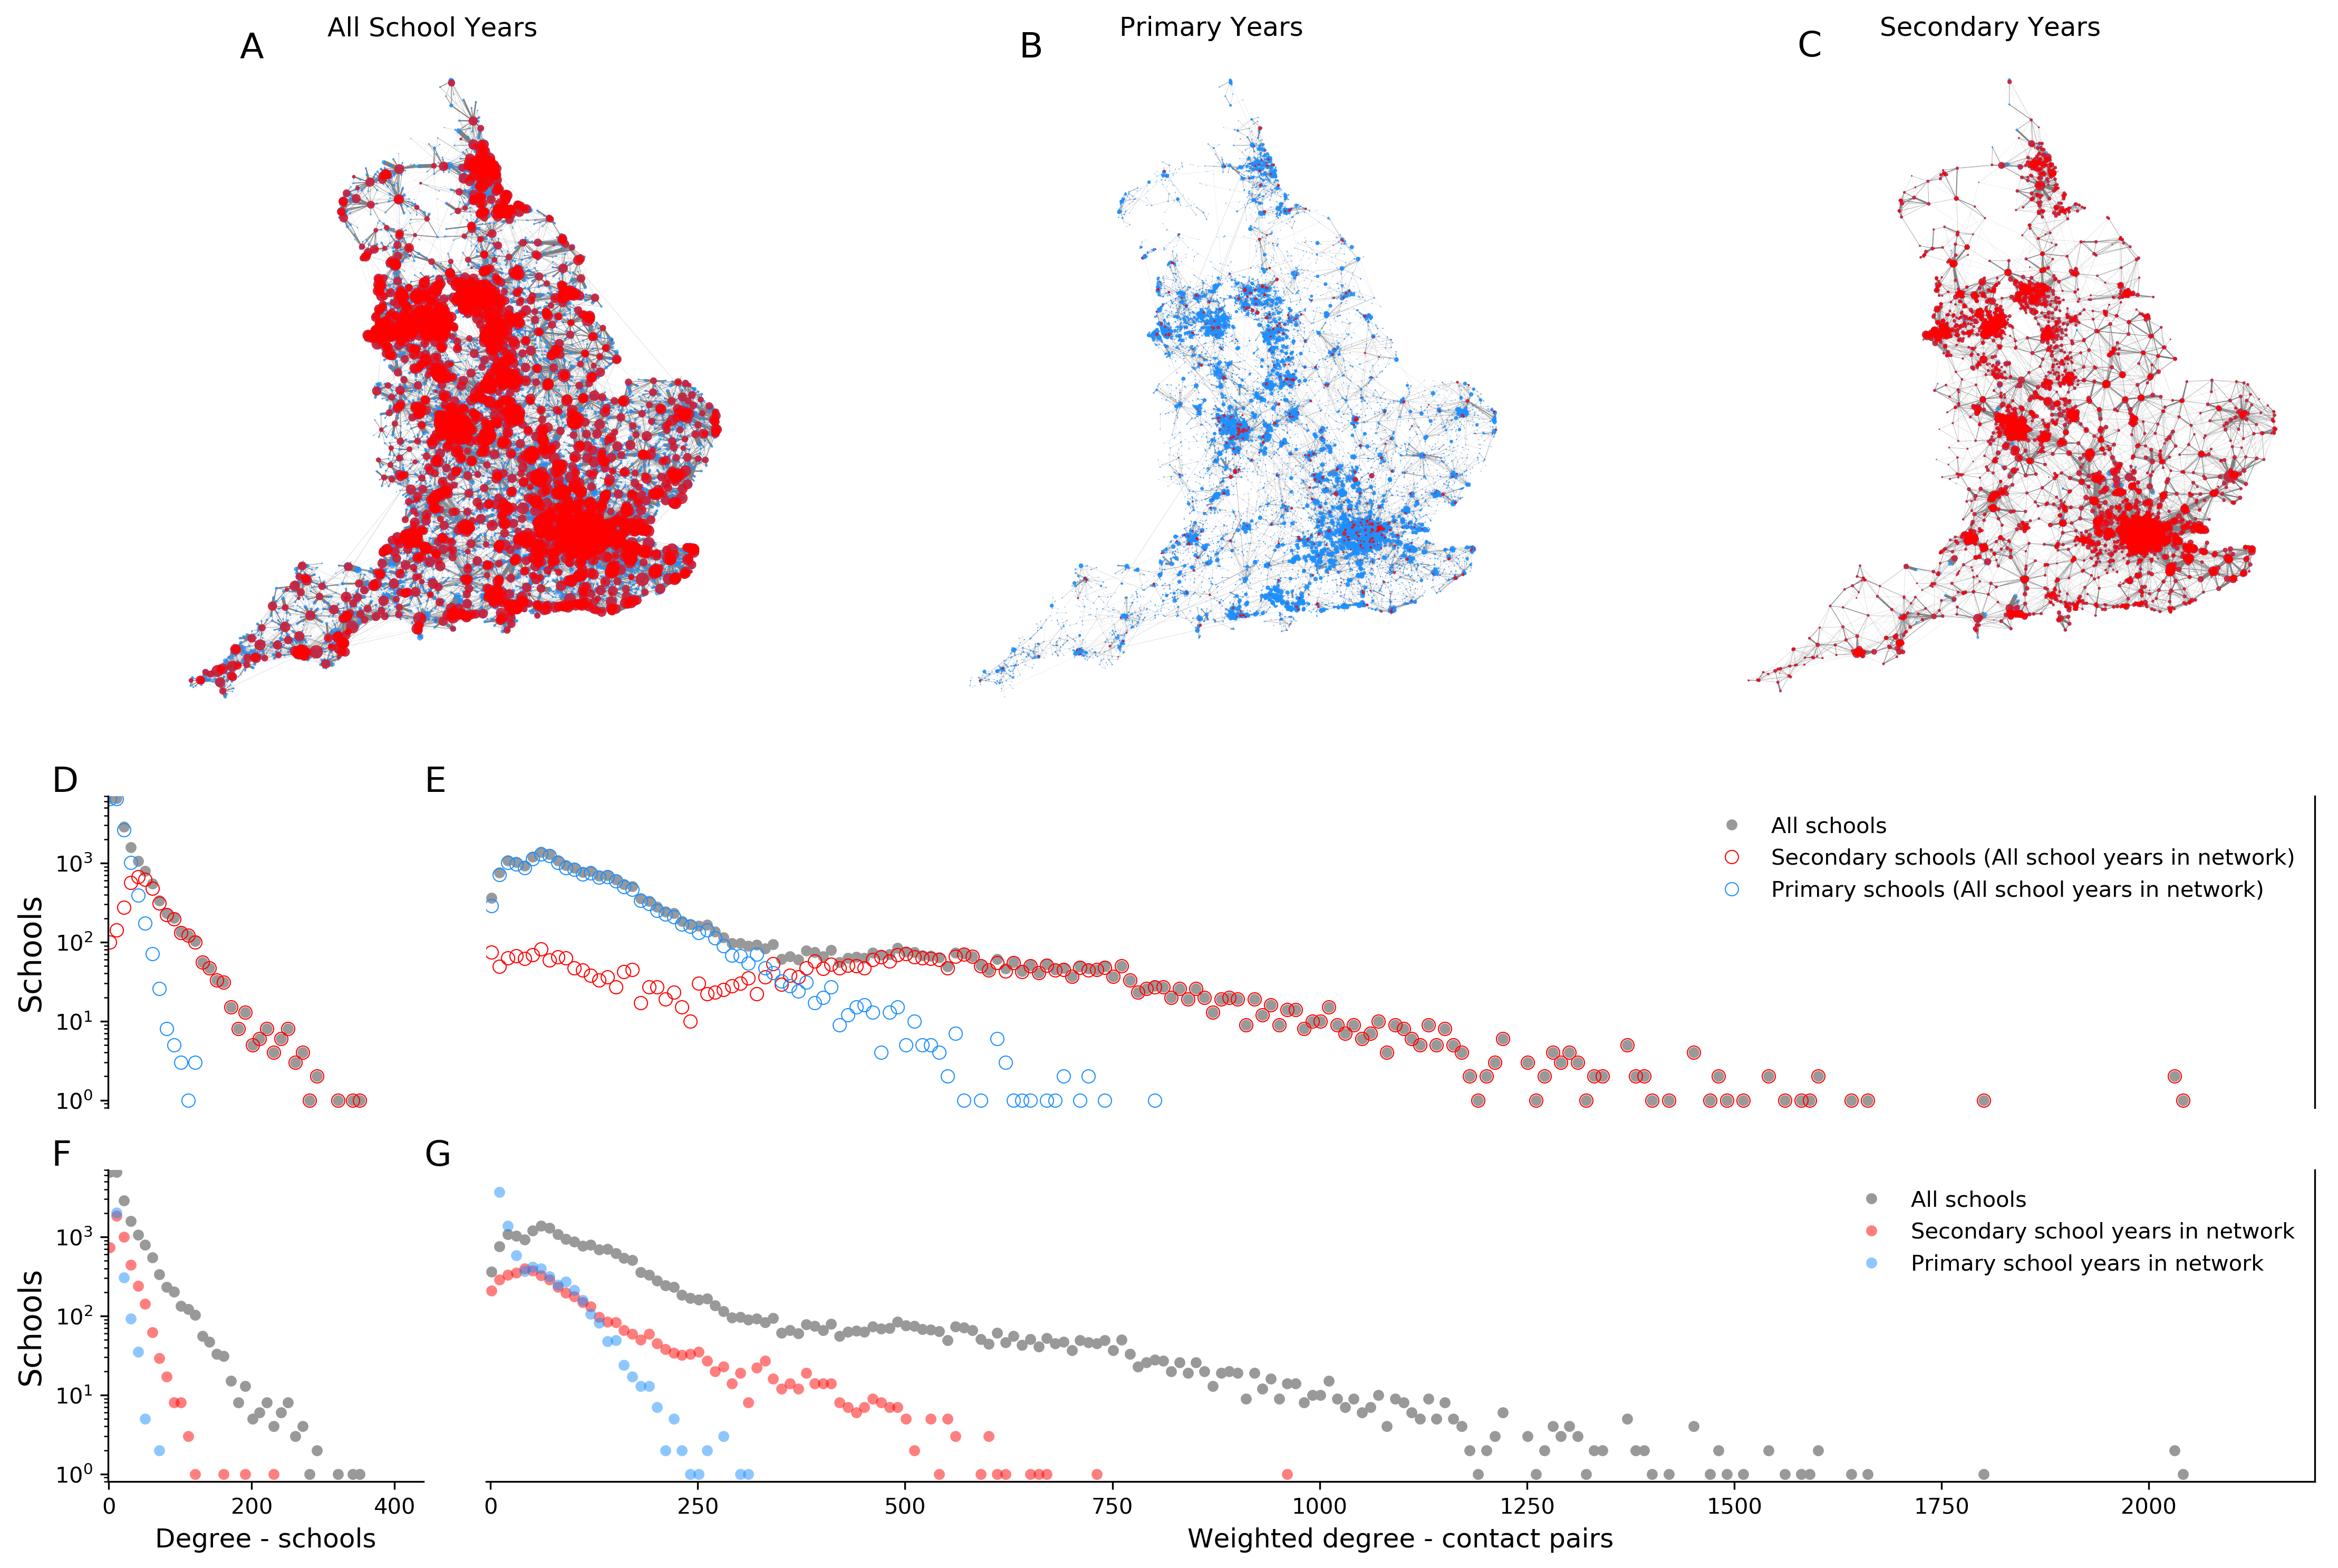

In [13]:
fig = plt.figure(figsize=[18,12], dpi=300)

ax1 = fig.add_subplot(4,3,(1,4))
ax2 = fig.add_subplot(4,3,(2,5))
ax3 = fig.add_subplot(4,3,(3,6))
naf.plot_transnet(trans_net=cont_net_all, pos=pos_geo, highlight=sec_codes, ax=ax1, title='All School Years', scaler=0.03)
ax1.set_aspect(1.5)
naf.plot_transnet(trans_net=cont_net_pri, pos=pos_geo, highlight=sec_codes,  ax=ax2, title='Primary Years', scaler=0.03)
ax2.set_aspect(1.5)
naf.plot_transnet(trans_net=cont_net_sec, pos=pos_geo, highlight=sec_codes,  ax=ax3, title='Secondary Years', scaler=0.03)
ax3.set_aspect(1.5)

ax1.text(x=-5, y= 56, s='A', fontsize=16)
ax2.text(x=-5, y= 56, s='B', fontsize=16)
ax3.text(x=-5, y= 56, s='C', fontsize=16)


contact_net = naf.create_network_from_transmat_undi(Full_net[0], Full_net[1])
degree_dict_sc = contact_net.degree()
sec_degrees_sc = [degree_dict_sc[s] for s in np.intersect1d(sec_codes,contact_net.nodes()) ]
pri_degrees_sc = [degree_dict_sc[s] for s in np.intersect1d(pri_codes,contact_net.nodes()) ]
degree_dict_cn = contact_net.degree(weight='weight')
sec_degrees_cn = [degree_dict_cn[s] for s in np.intersect1d(sec_codes,contact_net.nodes()) ]
pri_degrees_cn = [degree_dict_cn[s] for s in np.intersect1d(pri_codes,contact_net.nodes()) ]
histbits_sc_sec=np.histogram(sec_degrees_sc, bins=range(1,400, 10))
histbits_sc_pri=np.histogram(pri_degrees_sc, bins=range(1,400, 10))

histbits_cn_sec=np.histogram(sec_degrees_cn, bins=range(1,2100,10))
histbits_cn_pri=np.histogram(pri_degrees_cn, bins=range(1,2100,10))



secnet_degrees_sc = cont_net_sec.degree()
prinet_degrees_sc = cont_net_pri.degree()

secnet_degrees_cn = cont_net_sec.degree(weight='weight')
prinet_degrees_cn = cont_net_pri.degree(weight='weight')

sec_histbits_sc=np.histogram(secnet_degrees_sc, bins=range(1,400, 10))
pri_histbits_sc=np.histogram(prinet_degrees_sc, bins=range(1,400, 10))

sec_histbits_cn=np.histogram(secnet_degrees_cn, bins=range(1,2200, 10))
pri_histbits_cn=np.histogram(prinet_degrees_cn, bins=range(1,2200, 10))

sec_degrees_sc
pri_degrees_sc
sec_degrees_cn
pri_degrees_cn

secnet_degrees_sc
prinet_degrees_sc
secnet_degrees_cn
prinet_degrees_cn



degs = np.array(list(degree_dict_cn))[:,1]
print([np.median(degs), np.mean(degs), max(degs), min(degs)] )

ax = fig.add_subplot(4,6,13)
ax.text(x=-80, y= 8e3, s='D', fontsize=16)

plt.plot(histbits_sc_pri[1][:-1], histbits_sc_pri[0] + histbits_sc_sec[0], 'o', ms=5, mec="none", mfc='0.6', mew=0.8)
plt.plot(histbits_sc_sec[1][:-1], histbits_sc_sec[0], 'o', ms=6, mec='r', mfc='none', mew=0.5)
plt.plot(histbits_sc_pri[1][:-1], histbits_sc_pri[0], 'o', ms=6, mec='DodgerBlue', mfc='none', mew=0.5)





plt.yscale('log')

sns.despine(ax=ax, bottom=True)

plt.xlabel('', fontsize=12)
plt.ylabel('Schools', fontsize=14)
plt.legend().remove()
plt.ylim([0.8, 7e3])
plt.xlim([-1, 440])
ax.set_xticks([])
ax.set_xticks([], minor=True)

ax = fig.add_subplot(4,6,(14,18))
ax.text(x=-80, y= 8e3, s='E', fontsize=16)
plt.plot(histbits_cn_pri[1][:-1], histbits_cn_pri[0] + histbits_cn_sec[0], 'o', ms=5, mec="none", mfc='0.6', mew=0.8)

plt.plot(histbits_cn_sec[1][:-1], histbits_cn_sec[0], 'o', ms=6, mec='r', mfc='none', mew=0.5)
plt.plot(histbits_cn_pri[1][:-1], histbits_cn_pri[0], 'o', ms=6, mec='DodgerBlue', mfc='none', mew=0.5)



plt.yscale('log')

sns.despine(ax=ax)

plt.xlabel('degree', fontsize=14)
plt.ylabel('', fontsize=14)
plt.ylim([0.8, 7e3])
plt.xlim([-5, 2200])
ax.set_yticks([])
ax.set_yticks([], minor=True)
ax.set_xticks([])
ax.set_xticks([], minor=True)

sns.despine(left=True, right=False, bottom=True, ax=ax)


plt.xlabel('', fontsize=12)

plt.legend(['All schools', 'Secondary schools (All school years in network)', 'Primary schools (All school years in network)'], frameon=0)


ax = fig.add_subplot(4,6,19)
ax.text(x=-80, y= 8e3, s='F', fontsize=16)



plt.plot(histbits_sc_pri[1][:-1], histbits_sc_pri[0] + histbits_sc_sec[0], 'o', ms=5, mec="none", mfc='0.6', mew=0.8)


plt.plot(sec_histbits_sc[1][:-1], sec_histbits_sc[0], 'o', ms=5, mec="none", mfc='r', mew=0.8, alpha=0.5)
plt.plot(pri_histbits_sc[1][:-1], pri_histbits_sc[0], 'o', ms=5, mec="none", mfc='DodgerBlue', mew=0.8, alpha=0.5)


plt.yscale('log')

sns.despine(ax=ax)

plt.xlabel('Degree - schools', fontsize=12)
plt.ylabel('Schools', fontsize=14)
plt.legend().remove()
plt.ylim([0.8, 7e3])
plt.xlim([-1, 440])


ax = fig.add_subplot(4,6,(20,24))
ax.text(x=-80, y= 8e3, s='G', fontsize=16)


plt.plot(histbits_cn_pri[1][:-1], histbits_cn_pri[0] + histbits_cn_sec[0], 'o', ms=5, mec="none", mfc='0.6', mew=0.8)

plt.plot(sec_histbits_cn[1][:-1], sec_histbits_cn[0], 'o', ms=5, mec="none", mfc='r', mew=0.8, alpha=0.5)
plt.plot(pri_histbits_cn[1][:-1], pri_histbits_cn[0], 'o', ms=5, mec="none", mfc='DodgerBlue', mew=0.8, alpha=0.5)

plt.yscale('log')

sns.despine(ax=ax)

plt.xlabel('degree', fontsize=14)
plt.ylabel('', fontsize=14)

plt.ylim([0.8, 7e3])
plt.xlim([-5, 2200])
ax.set_yticks([])
ax.set_yticks([], minor=True)

sns.despine(left=True, right=False, ax=ax)


plt.xlabel('Weighted degree - contact pairs', fontsize=12)

plt.legend(['All schools', 'Secondary school years in network', 'Primary school years in network'], frameon=0)


fig.set_facecolor('white')



In [14]:
print(np.mean(list(dict(degree_dict_sc).values())))
print(max(list(dict(degree_dict_sc).values())))
print(np.mean(list(dict(degree_dict_cn).values())))
print(max(list(dict(degree_dict_cn).values())))

print('\n')

print(np.mean(sec_degrees_sc))
print(max(sec_degrees_sc))
print(np.mean(pri_degrees_sc))
print(max(pri_degrees_sc))

print('\n')

print(np.mean(sec_degrees_cn))
print(max(sec_degrees_cn))
print(np.mean(pri_degrees_cn))
print(max(pri_degrees_cn))

print('\n')

print(np.mean(list(dict(secnet_degrees_sc).values())))
print(max(list(dict(secnet_degrees_sc).values())))
print(np.mean(list(dict(prinet_degrees_sc).values())))
print(max(list(dict(prinet_degrees_sc).values())))

print('\n')

print(np.mean(list(dict(secnet_degrees_cn).values())))
print(max(list(dict(secnet_degrees_cn).values())))
print(np.mean(list(dict(prinet_degrees_cn).values())))
print(max(list(dict(prinet_degrees_cn).values())))

25.395708790954167
400
184.45535010890217
2045


64.79552487502976
400
15.871101392565313
127


479.84813139728635
2045
113.04638048106801
806


22.578334431992968
233
6.040593894233442
78


102.66139310041748
967
21.508647055552466
312


In [15]:
years_actives = [[1, 6, 'R', '1', '6'], [1, 6, 'R', '1', '6', 10, '10'], [1, 6, 'R', '1', '6', 12, '12'], 
                 [1, 6, 'R', '1', '6', 10, '10', '12', 12], [1, 2, 3, 4, 5, 6, 'R', '1', '2', '3', '4', '5', '6'], 
                 [7, 8, 9, 10, 11, 12, 13, '7', '8', '9', '10', '11', '12', '13'], 
                 [1, 2, 3, 4, 5, 6, 'R', '1', '2', '3', '4', '5', '6', 7, 8, 9, 10, 11, 12, 13, '7', '8', '9', '10', '11', '12', '13']]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


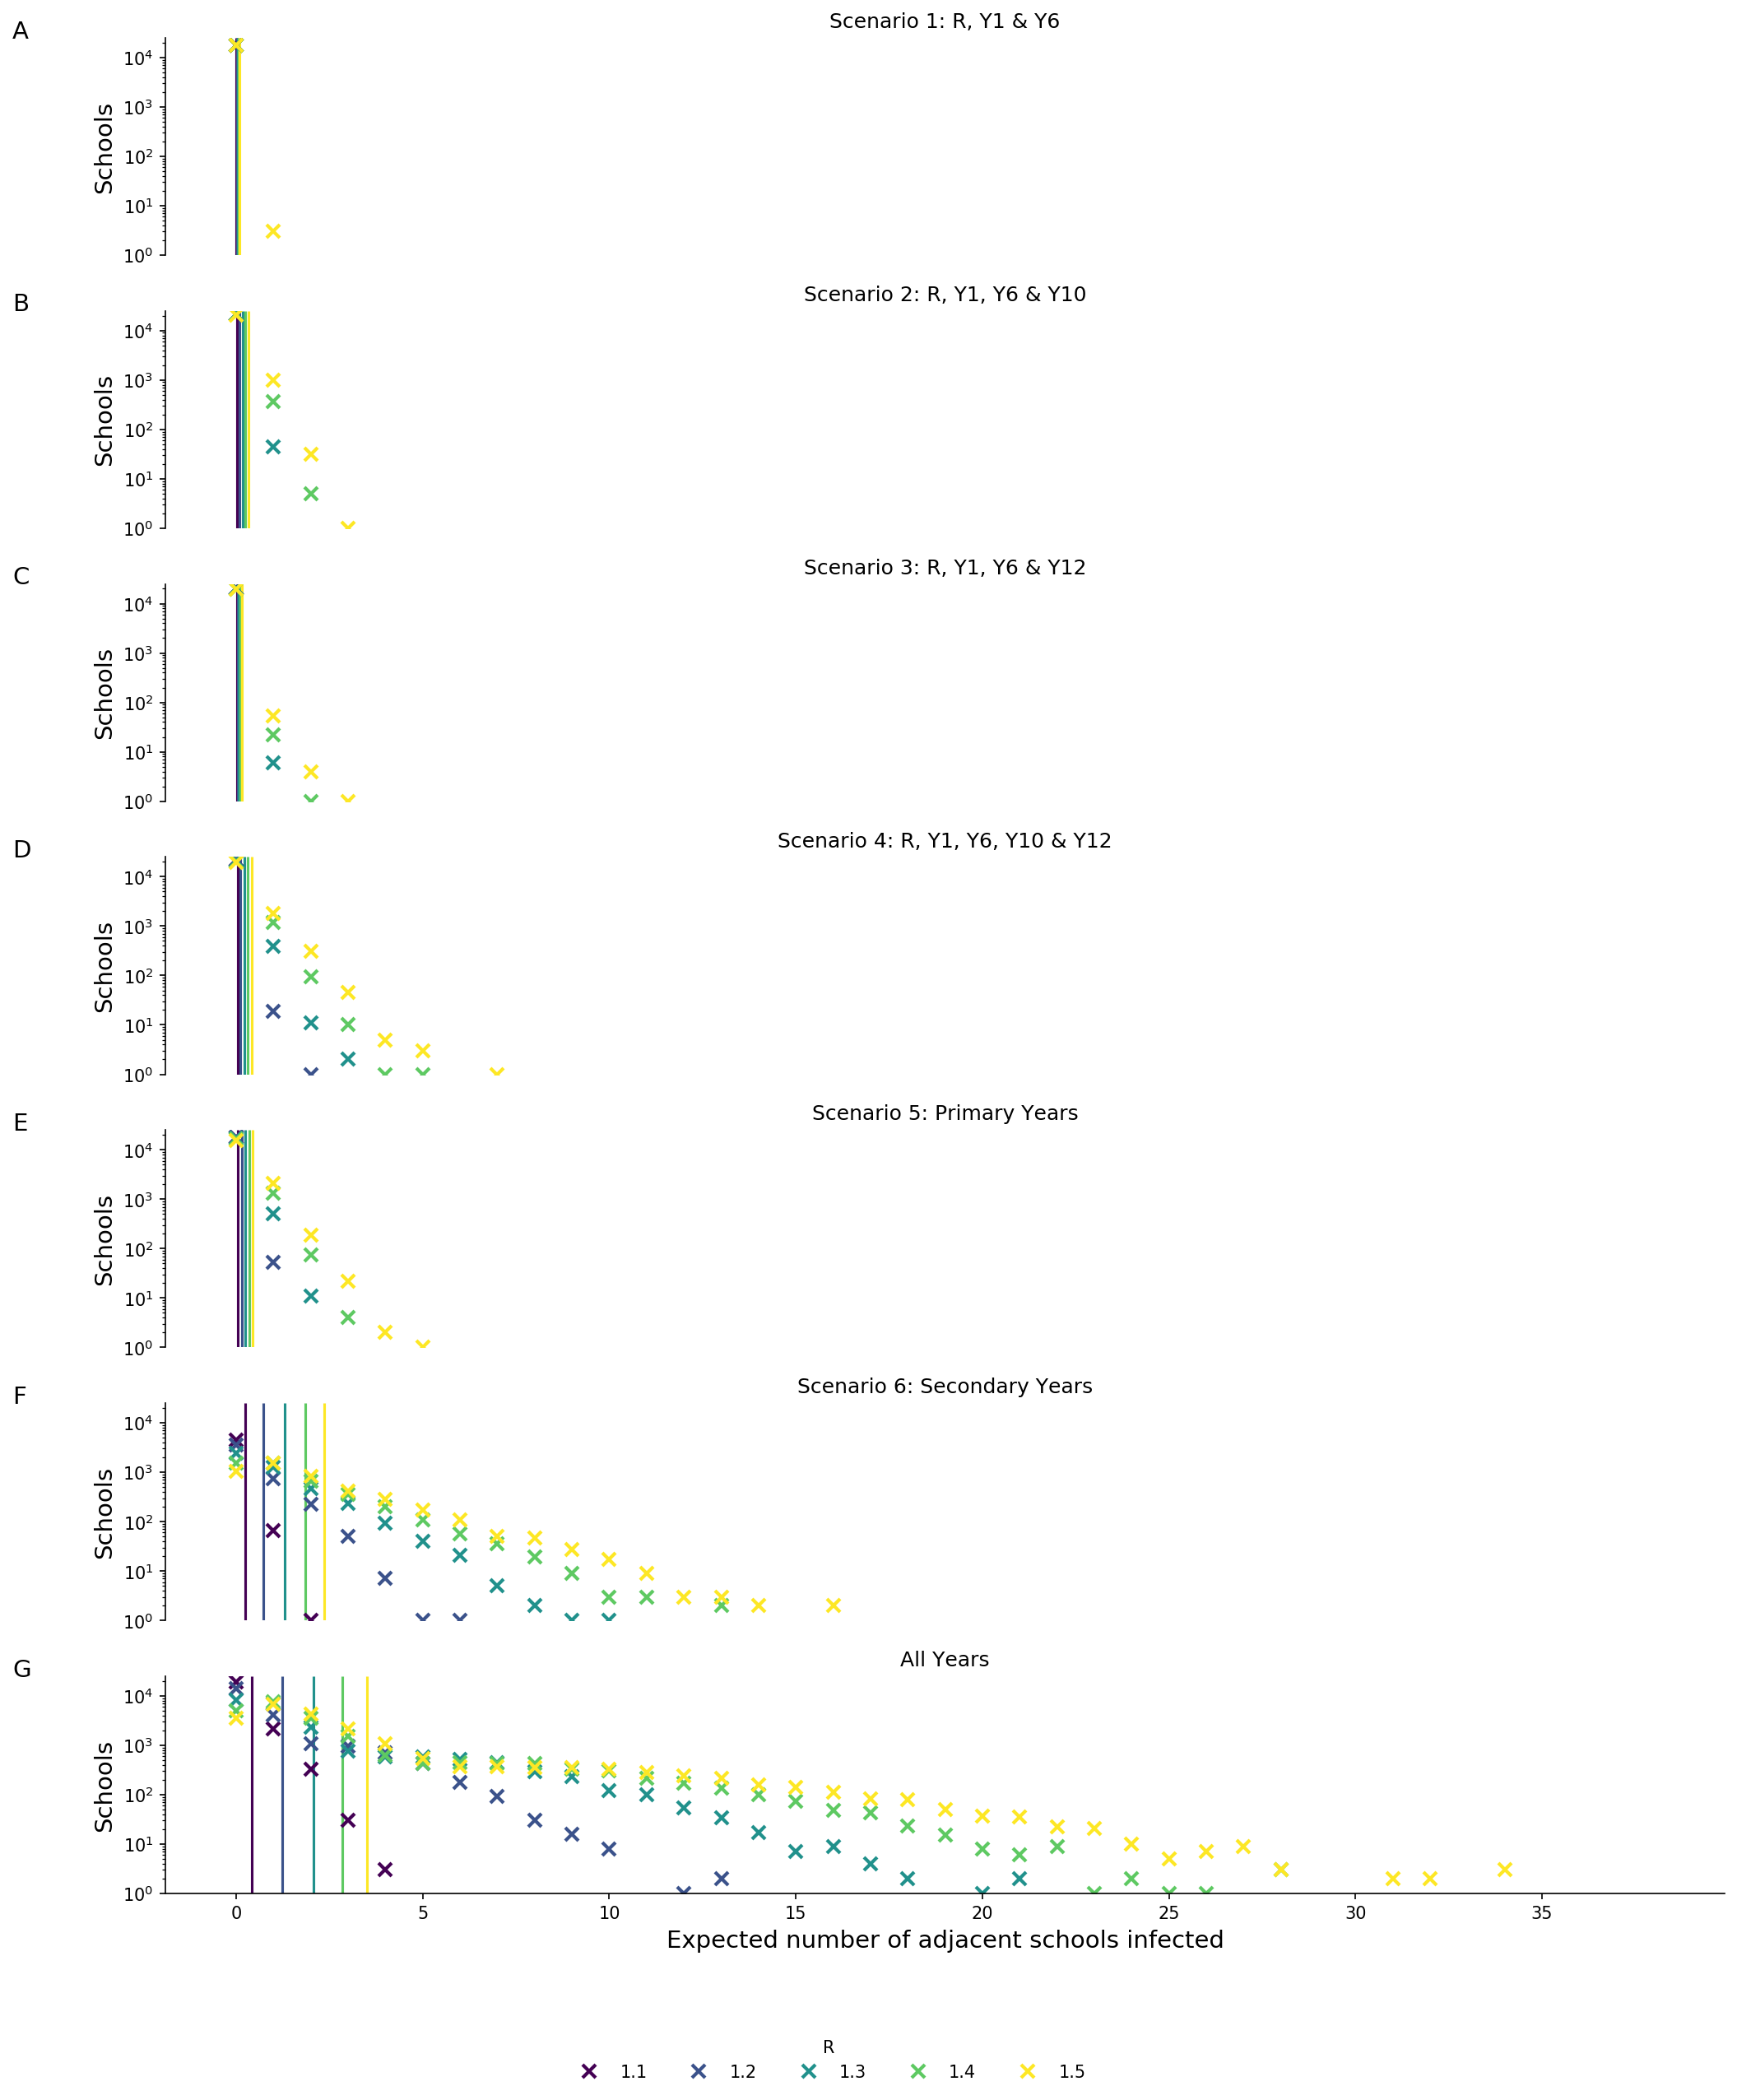

In [16]:
scenarios = ['Scenario 1: R, Y1 & Y6', 'Scenario 2: R, Y1, Y6 & Y10', 'Scenario 3: R, Y1, Y6 & Y12', 
             'Scenario 4: R, Y1, Y6, Y10 & Y12', 'Scenario 5: Primary Years', 'Scenario 6: Secondary Years', 'All Years']
letters = list(string.ascii_uppercase)
fig = plt.figure(figsize=[14,17], dpi=150)
for y, years_active in enumerate(years_actives):
    ax = fig.add_subplot(7,1, y + 1)
    adjmat, nodelist, pdl= naf.specific_years_adjmat(years_active = years_active, pupil_data=pupil_data)
    ax.text(x=-6, y= 2.5e4, s=letters[y], fontsize=14)
    
    for i, r0 in enumerate(np.arange(1.1, 1.6, 0.1)):
        uk_trans_mat = naf.create_transmat_from_adjmat(adjmat, nodelist=nodelist, R0=r0, q=0.15)
        uk_trans_net = naf.create_network_from_transmat_undi(uk_trans_mat, nodelist)
        degree_dict_cn = uk_trans_net.degree(weight='weight')
        histbits_cn=np.histogram(np.array(list(degree_dict_cn))[:,1], bins=range(0,40))


        
        degs = np.array(list(degree_dict_cn))[:,1]

        ax.plot(histbits_cn[1][:-1], histbits_cn[0], 'x', mew=2, ms=8, c=viridis(i))
        plt.vlines(x=np.mean(degs), ymax=2.5e4, ymin=0, color=viridis(i))
        plt.title(scenarios[y])



    plt.yscale('log')
    
    plt.ylim([1,2.5e4])
    
    if y < 6:

        sns.despine(ax=ax, bottom=True)
        plt.xticks([])
        plt.xlabel('', fontsize=14)
    else: 
        sns.despine(ax=ax)
        plt.xlabel('Expected number of adjacent schools infected', fontsize=14)

        
    
    plt.ylabel('Schools', fontsize=14)
    plt.legend().remove()

sns.despine(ax=ax, bottom=False)
plt.legend(labels=list(map(lambda x : round(x,2), np.arange(1.1, 1.6, 0.1))), ncol=5, bbox_to_anchor=[0.6,-0.6], title='R', frameon=False)
    
plt.tight_layout()


In [ ]:
summary = []
for y, years_active in enumerate(years_actives):
    adjmat, nodelist, lpd = naf.specific_years_adjmat(years_active = years_active, pupil_data=pupil_data)

    for i, r0 in enumerate(np.arange(1.1, 1.6, 0.1)):
        uk_trans_mat = naf.create_transmat_from_adjmat(adjmat, nodelist=nodelist, R0=r0, q=0.15)
        uk_trans_net = naf.create_network_from_transmat_undi(uk_trans_mat, nodelist)
        degree_dict_cn = uk_trans_net.degree(weight='weight')
        degs = np.array(list(degree_dict_cn))[:,1]
        summary.append([y, r0, np.median(degs), np.mean(degs), max(degs), min(degs)] )
        
pd.DataFrame(summary).to_csv('degree_summary_1.csv')

In [7]:
from multiprocess import Pool

In [13]:
years_actives = [[1, 6, 'R', '1', '6'], [1, 6, 'R', '1', '6', 10, '10'], [1, 6, 'R', '1', '6', 12, '12'], 
                 [1, 6, 'R', '1', '6', 10, '10', '12', 12], [1, 2, 3, 4, 5, 6, 'R', '1', '2', '3', '4', '5', '6'], [7, 8, 9, 10, 11, 12, 13, '7', '8', '9', '10', '11', '12', '13'], 
                [1, 2, 3, 4, 5, 6, 'R', '1', '2', '3', '4', '5', '6', 7, 8, 9, 10, 11, 12, 13, '7', '8', '9', '10', '11', '12', '13']]
iters = 100

def return_components(y):
    print('Starting: ', y)
    iters = 100
    years_actives = [[1, 6, 'R', '1', '6'], [1, 6, 'R', '1', '6', 10, '10'], [1, 6, 'R', '1', '6', 12, '12'], 
                 [1, 6, 'R', '1', '6', 10, '10', '12', 12], [1, 2, 3, 4, 5, 6, 'R', '1', '2', '3', '4', '5', '6'], [7, 8, 9, 10, 11, 12, 13, '7', '8', '9', '10', '11', '12', '13'], 
                [1, 2, 3, 4, 5, 6, 'R', '1', '2', '3', '4', '5', '6', 7, 8, 9, 10, 11, 12, 13, '7', '8', '9', '10', '11', '12', '13']]
    years_active = years_actives[y]
    adjmat, nodelist, pupil_data_local = naf.specific_years_adjmat(years_active = years_active, pupil_data=pupil_data)
    for R0 in np.arange(1.1, 1.6, 0.1):
        print('Processing: ', R0, ' for ', y)
        uk_trans_mat = naf.create_transmat_from_adjmat(adjmat, nodelist=nodelist, R0=R0, q=0.15)
        dfs = []
        for n in range(iters):
            print(y, R0, n)
            uk_trans_mat_bin = (uk_trans_mat > np.random.rand(*adjmat.shape))*1.

            cc_out = naf.calculate_connected_components_nx(uk_trans_mat_bin, nodelist)




            for i,cc in enumerate(list(cc_out)): 
                hh_ids = pupil_data_local[pupil_data_local.URN_AUT20.isin(cc)].hh_id.unique()
                dfs.append(pd.DataFrame(np.transpose([list(cc), [i+1]*len(cc), [len(cc)]*len(cc), [len(hh_ids)]*len(cc), [n+1]*len(cc) ]), 
                                        columns=['urn', 'component', 'size', 'size_hh', 'n']))

        df = pd.concat(dfs)
        df.to_csv('/Users/lsh1514285/jdrive/SCDATA/' + str(round(R0,2)) + '_' + str(y) + '.csv')




In [14]:
with Pool(5) as p:
    p.map(return_components, np.arange(0,7))

Starting:  1
Starting:  2
Starting:  0
Starting:  3
Starting:  4
Processing:  1.1  for  0
Processing:  1.1  for  2
Processing:  1.1  for  1
Processing:  1.1  for  3
0 1.1 0
2 1.1 0
1 1.1 0
3 1.1 0
Processing:  1.1  for  4
4 1.1 0
0 1.1 1
2 1.1 1
1 1.1 1
3 1.1 1
0 1.1 2
4 1.1 1
2 1.1 2
0 1.1 3
1 1.1 2
3 1.1 2
2 1.1 3
0 1.1 4
4 1.1 2
0 1.1 5
1 1.1 3
2 1.1 4
3 1.1 3
0 1.1 6
4 1.1 3
2 1.1 5
1 1.1 4
0 1.1 7
3 1.1 4
2 1.1 6
4 1.1 4
0 1.1 8
1 1.1 5
2 1.1 7
0 1.1 9
3 1.1 5
4 1.1 5
1 1.1 6
0 1.1 10
2 1.1 8
3 1.1 6
0 1.1 11
2 1.1 9
1 1.1 7
4 1.1 6
0 1.1 12
3 1.1 7
2 1.1 10
0 1.1 13
1 1.1 8
4 1.1 7
0 1.1 14
2 1.1 11
3 1.1 8
1 1.1 9
0 1.1 15
2 1.1 12
4 1.1 8
0 1.1 16
3 1.1 9
1 1.1 10
2 1.1 13
0 1.1 17
4 1.1 9
2 1.1 14
0 1.1 18
3 1.1 10
1 1.1 11
0 1.1 19
2 1.1 15
4 1.1 10
1 1.1 12
3 1.1 11
0 1.1 20
2 1.1 16
0 1.1 21
4 1.1 11
1 1.1 13
3 1.1 12
2 1.1 17
0 1.1 22
0 1.1 23
2 1.1 18
1 1.1 14
4 1.1 12
3 1.1 13
0 1.1 24
2 1.1 19
1 1.1 15
0 1.1 25
4 1.1 13
3 1.1 14
2 1.1 20
0 1.1 26
1 1.1 16
0 1.1 27
2 1.1

In [17]:
def round_to_1(x):
    return round(x, -int(math.floor(math.log10(abs(x)))))
cc_datas = []
for f in os.listdir('runs_100_hs_2'): 
    if f[-1] == 'v':
        print(f)
        cc_data = pd.read_csv('runs_100_hs_2/' + f)
        cc_data['R0'] = float(f[:3])
        cc_data['scenario'] = float(f[-5])
        cc_datas.append(cc_data)
        
            
            
all_cc_data = pd.concat(cc_datas)

all_cc_data['compsize_bin'] = pd.cut(all_cc_data['size'], bins=[0] + list(map(round_to_1, [5 * 4**n for n in range(6)])) + [22000])
all_cc_data['compsize_bin_hh'] = pd.cut(all_cc_data['size_hh'], bins=[0] + list(map(round_to_1, [100 * 6**n for n in range(7)])))

1.5_5.csv
1.1_1.csv
1.3_3.csv
1.3_2.csv
1.1_0.csv
1.5_4.csv
1.5_6.csv
1.1_2.csv
1.3_0.csv
1.3_1.csv
1.1_3.csv
1.5_3.csv
1.3_5.csv
1.3_4.csv
1.1_6.csv
1.5_2.csv
1.5_0.csv
1.1_4.csv
1.3_6.csv
1.1_5.csv
1.5_1.csv
1.2_0.csv
1.4_6.csv
1.2_1.csv
1.2_3.csv
1.4_5.csv
1.4_4.csv
1.2_2.csv
1.2_6.csv
1.4_0.csv
1.4_1.csv
1.2_5.csv
1.4_3.csv
1.4_2.csv
1.2_4.csv


In [18]:
max_component_groups_sc = all_cc_data.groupby(['scenario', 'R0', 'n']).max()[['size']].reset_index()
max_component_groups_hh = all_cc_data.groupby(['scenario', 'R0', 'n']).max()[['size_hh']].reset_index()

In [19]:
mean_component_groups_sc = all_cc_data.groupby(['scenario', 'R0', 'n']).mean()[['size']].reset_index()
mean_component_groups_hh = all_cc_data.groupby(['scenario', 'R0', 'n']).mean()[['size_hh']].reset_index()

In [20]:
def D95(data, column='size'):
    n = len(data[column])
    sort = sorted(data[column])
    return sort[int(n * 0.95)]

def D05(data, column='size'):
    n = len(data[column])
    sort = sorted(data[column])
    return sort[int(n * 0.05)]

In [21]:
largest_components_sc = pd.concat([max_component_groups_sc.groupby(['scenario', 'R0']).median()[['size']].rename(columns={'size':'median'}), 
                                max_component_groups_sc.groupby(['scenario', 'R0']).apply(D05), 
                                max_component_groups_sc.groupby(['scenario', 'R0']).apply(D95)], axis=1).rename(columns={0:'low', 1:'high'}).reset_index()
largest_components_hh = pd.concat([max_component_groups_hh.groupby(['scenario', 'R0']).median()[['size_hh']].rename(columns={'size_hh':'median'}), 
                                max_component_groups_hh.groupby(['scenario', 'R0']).apply(D05,'size_hh'), 
                                max_component_groups_hh.groupby(['scenario', 'R0']).apply(D95, 'size_hh')], axis=1).rename(columns={0:'low', 1:'high'}).reset_index()

In [22]:
largest_components_hh.merge(largest_components_sc, on=['scenario','R0']).to_csv('larges_components.csv')

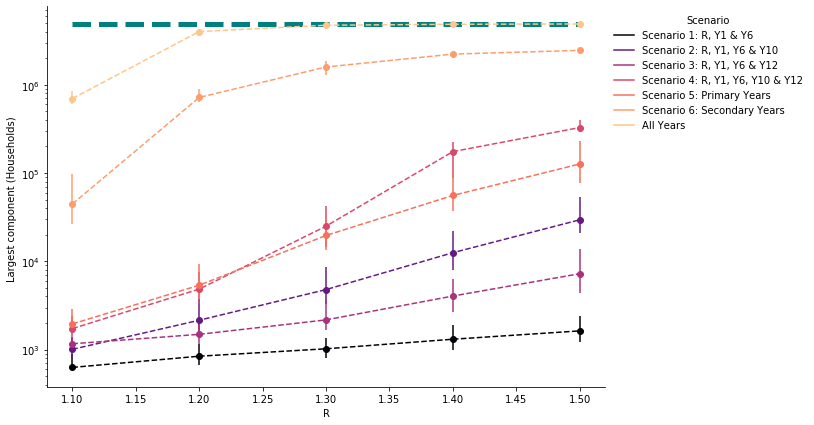

In [23]:
fig = plt.figure(figsize=[10,7])
for i,sen in enumerate(np.arange(7)):
    lc_sen = largest_components_hh[largest_components_hh.scenario==sen]
    round2 = lambda x: round(x,2)
    xs = np.array(list(map(round2, np.arange(1.1, 1.6, 0.1))))
    plt.plot(xs, lc_sen['median'], 'o--', color=cm.magma(i**0.5/2.5 -0.1))
    plt.vlines(xs, ymin=lc_sen['low'], ymax=lc_sen['high'], color=cm.magma(i**0.5/2.5 -0.1))
    plt.yscale('log')
    sns.despine()
    
plt.xlabel('R')
plt.ylabel('Largest component (Households) ')
legend_elements = [Line2D([0], [0], color=cm.magma(i**0.5/2.5 -0.1), label=scenarios[r]) for i,r in enumerate(np.arange(7))]
plt.hlines(xmin= 1.1, xmax=1.5, y=4927163, color="Teal", linestyle='--', linewidth=5)
plt.legend(handles= legend_elements, ncol=1, bbox_to_anchor=[1,1], title='Scenario', frameon=False)



In [24]:
round2 = lambda x: round(x,2)

In [25]:
def sum_unique_components_hh(data):
    return data[['component', 'size_hh']].groupby('component').mean().size_hh.sum()
def sum_unique_components_sc(data):
    return data[['component', 'size']].groupby('component').mean()['size'].sum()

In [26]:
dist_component_groups_sc = pd.DataFrame(all_cc_data.groupby(['scenario', 'R0', 'compsize_bin', 'n']).apply(sum_unique_components_sc), columns=['size'])
dist_component_groups_hh = pd.DataFrame(all_cc_data.groupby(['scenario', 'R0', 'compsize_bin_hh', 'n']).apply(sum_unique_components_hh), columns=['size_hh'])

In [27]:
import re

letters = list(string.ascii_uppercase)


bins_hh = list(map(str, np.sort(all_cc_data.compsize_bin_hh.unique())))
bins_sc = list(map(str, np.sort(all_cc_data.compsize_bin.unique())))

def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

bins_hh = ['({},{}]'.format(*list(map(human_format, list(map(int, re.findall(r'\d+', b)))))) for b in bins_hh]
bins_sc = ['({},{}]'.format(*list(map(human_format, list(map(int, re.findall(r'\d+', b)))))) for b in bins_sc]

scenarios = ['Scenario 1: \nR, Y1 & Y6', 'Scenario 2: \nR, Y1, Y6 & Y10', 'Scenario 3: \nR, Y1, Y6 & Y12', 
             'Scenario 4: \nR, Y1, Y6, Y10 & Y12', 'Scenario 5: \nPrimary Years', 'Scenario 6: \nSecondary Years', 'All Years']

In [28]:
dist_components_sc = pd.concat([dist_component_groups_sc.groupby(['scenario', 'R0', 'compsize_bin']).median()[['size']].rename(columns={'size':'median'}), 
                                dist_component_groups_sc.groupby(['scenario', 'R0', 'compsize_bin']).min()[['size']].rename(columns={'size':'low'}), 
                                dist_component_groups_sc.groupby(['scenario', 'R0', 'compsize_bin']).max()[['size']].rename(columns={'size':'high'})], axis=1).rename(columns={0:'low', 1:'high'}).reset_index().replace(np.nan, 0)
dist_components_hh = pd.concat([dist_component_groups_hh.groupby(['scenario', 'R0', 'compsize_bin_hh']).median()[['size_hh']].rename(columns={'size_hh':'median'}), 
                                dist_component_groups_hh.groupby(['scenario', 'R0', 'compsize_bin_hh']).min()[['size_hh']].rename(columns={'size_hh':'low'}), 
                                dist_component_groups_hh.groupby(['scenario', 'R0', 'compsize_bin_hh']).max()[['size_hh']].rename(columns={'size_hh':'high'})], axis=1).rename(columns={0:'low', 1:'high'}).reset_index().replace(np.nan, 0)

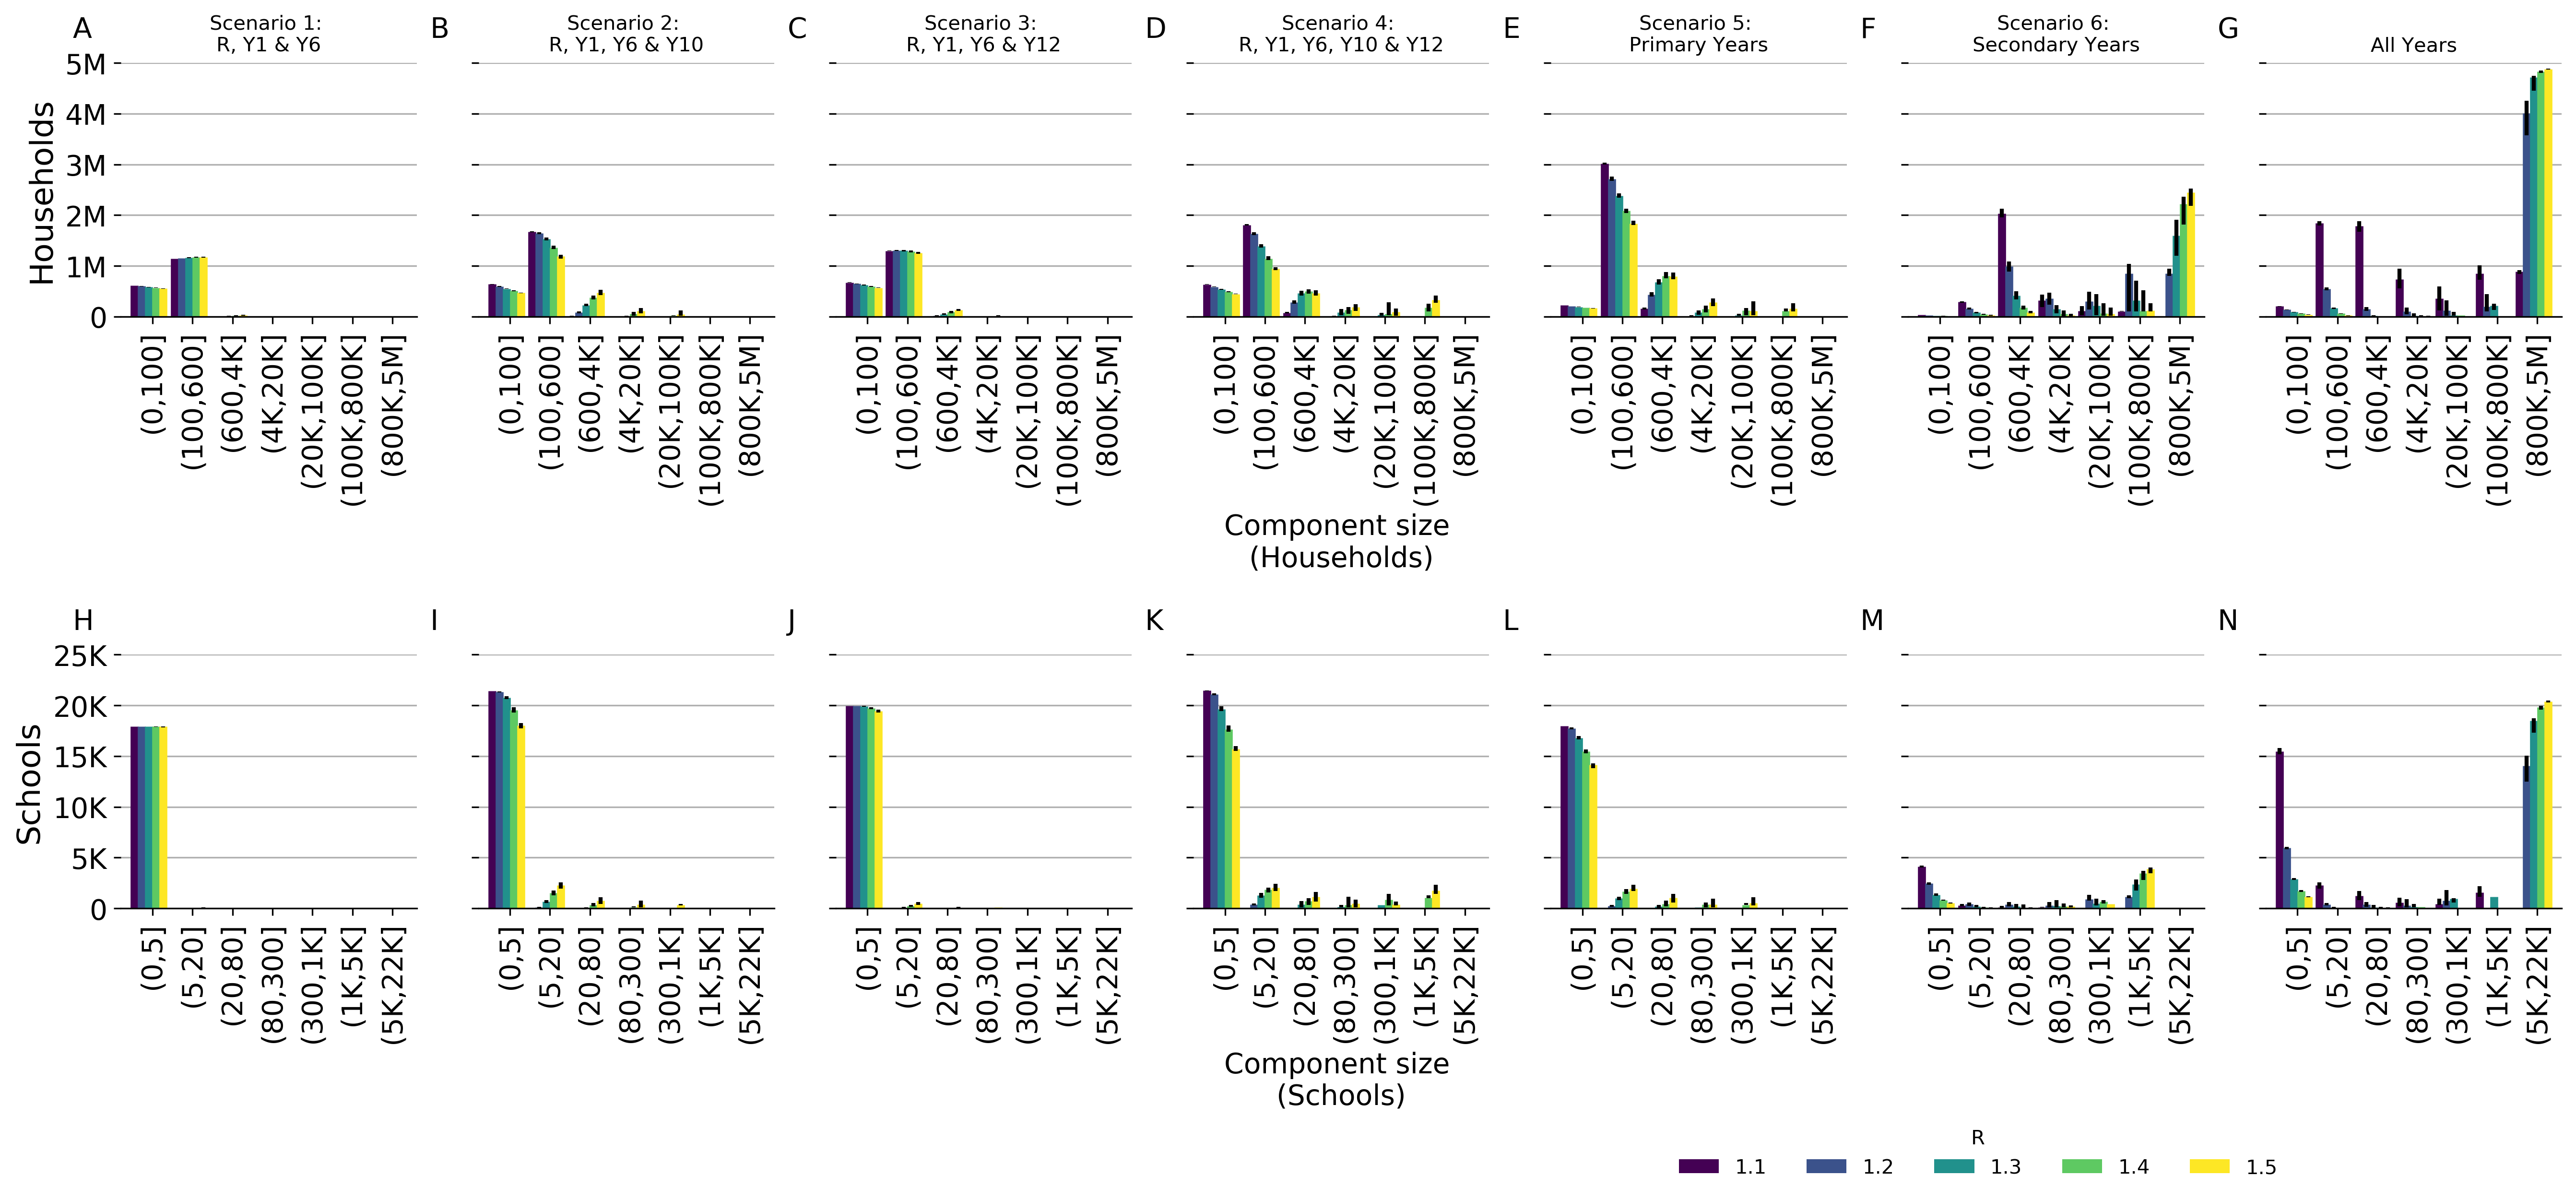

In [29]:
fig = plt.figure(figsize = [18,8], dpi=300)

for s in range(7):
    ax = fig.add_subplot(2, 7, s+1)

    for i,R0 in enumerate(np.arange(1.1,1.6, 0.1)):
        dist_R0 = dist_components_hh[(dist_components_hh.scenario == s) & (dist_components_hh.R0 == round(R0,2))]
        plt.vlines(x=np.arange(0,7) + (-0.45 + i*0.9/5), ymax=dist_R0['median'], ymin=0, color=viridis(i), lw=4)
        plt.vlines(x=np.arange(0,7) + (-0.45 + i*0.9/5), ymax=dist_R0['high'], ymin=dist_R0['low'], lw=2)


    ax.set_ylim([0, 5e6])
    ax.set_yticklabels([human_format(l) for l in range(0, 6000000, 1000000)], fontsize=14)
    ax.set_xticks(range(7))
    ax.set_xticklabels(bins_hh, rotation='vertical', fontsize=14)
    if s > 0:
        ax.set_yticklabels([])
        sns.despine(left=True)
        
    if s == 0: 
        ax.set_ylabel('Households', fontsize=16)
        
    if s == 3: 
        ax.set_xlabel('Component size \n(Households)', fontsize=14)
    ax.grid(axis="y")
    ax.text(x=-2, y= 1.1*5e6, s=letters[s], fontsize=14)
    ax.set_title(scenarios[s], fontsize=10)
    
for s in range(7):
    ax = fig.add_subplot(2, 7, s+8)

    for i,R0 in enumerate(np.arange(1.1,1.6, 0.1)):
        dist_R0 = dist_components_sc[(dist_components_sc.scenario == s) & (dist_components_sc.R0 == round(R0,2))]
        plt.vlines(x=np.arange(0,7) + (-0.45 + i*0.9/5), ymax=dist_R0['median'], ymin=0, color=viridis(i), lw=4)
        plt.vlines(x=np.arange(0,7) + (-0.45 + i*0.9/5), ymax=dist_R0['high'], ymin=dist_R0['low'], lw=2)


    ax.set_ylim([0, 2.5e4])
    ax.set_yticklabels([human_format(l) for l in range(0, 26000, 5000)], fontsize=14)
    ax.set_xticks(range(7))
    ax.set_xticklabels(bins_sc, rotation='vertical', fontsize=14)
    ax.text(x=-2, y= 1.1*2.5e4, s=letters[s + 7], fontsize=14)

    if s > 0:
        ax.set_yticklabels([])
        sns.despine( left=True)
    ax.grid(axis="y")
    if s == 0: 
        ax.set_ylabel('Schools', fontsize=16)
        
    if s == 3: 
        ax.set_xlabel('Component size \n(Schools)', fontsize=14)
    
plt.tight_layout()
fig.set_facecolor('white')
legend_elements = [Patch(facecolor=viridis(i), label=round(r,2)) for i,r in enumerate(np.arange(1.1, 1.6, 0.1 ))]

plt.legend(handles= legend_elements, ncol=5, bbox_to_anchor=[0.1,-0.8], title='R', frameon=False)

    

In [43]:
dist_components_sc[dist_components_sc.R0 == 1.5]


scenario   R0   compsize_bin   median      low     high
28        0.0  1.5         (0, 5]  17908.5  17843.0  17937.0
29        0.0  1.5        (5, 20]     43.5     15.0    109.0
30        0.0  1.5       (20, 80]      0.0      0.0      0.0
31        0.0  1.5      (80, 300]      0.0      0.0      0.0
32        0.0  1.5    (300, 1000]      0.0      0.0      0.0
33        0.0  1.5   (1000, 5000]      0.0      0.0      0.0
34        0.0  1.5  (5000, 22000]      0.0      0.0      0.0
63        1.0  1.5         (0, 5]  18023.5  17736.0  18264.0
64        1.0  1.5        (5, 20]   2261.0   1964.0   2567.0
65        1.0  1.5       (20, 80]    750.0    421.0   1112.0
66        1.0  1.5      (80, 300]    401.5    101.0    777.0
67        1.0  1.5    (300, 1000]    313.5    303.0    410.0
68        1.0  1.5   (1000, 5000]      0.0      0.0      0.0
69        1.0  1.5  (5000, 22000]      0.0      0.0      0.0
98        2.0  1.5         (0, 5]  19442.0  19316.0  19564.0
99        2.0  1.5        (5, 20]    465.0    316.0    603.0
100       2.0  1.5       (20, 80]     76.0     21.0    153.0
101       2.0  1.5      (80, 300]     90.5     83.0     98.0
102       2.0  1.5    (300, 1000]      0.0      0.0      0.0
103       2.0  1.5   (1000, 5000]      0.0      0.0      0.0
104       2.0  1.5  (5000, 22000]      0.0      0.0      0.0
133       3.0  1.5         (0, 5]  15715.5  15514.0  15976.0
134       3.0  1.5        (5, 20]   2023.0   1685.0   2423.0
135       3.0  1.5       (20, 80]   1137.5    672.0   1600.0
136       3.0  1.5      (80, 300]    476.5     99.0    840.0
137       3.0  1.5    (300, 1000]    398.0    302.0    683.0
138       3.0  1.5   (1000, 5000]   1759.5   1435.0   2332.0
139       3.0  1.5  (5000, 22000]      0.0      0.0      0.0
168       4.0  1.5         (0, 5]  14130.0  13803.0  14305.0
169       4.0  1.5        (5, 20]   1946.5   1693.0   2302.0
170       4.0  1.5       (20, 80]   1029.5    584.0   1417.0
171       4.0  1.5      (80, 300]    377.5     83.0    960.0
172       4.0  1.5    (300, 1000]    533.0    306.0   1072.0
173       4.0  1.5   (1000, 5000]      0.0      0.0      0.0
174       4.0  1.5  (5000, 22000]      0.0      0.0      0.0
203       5.0  1.5         (0, 5]    538.0    494.0    588.0
204       5.0  1.5        (5, 20]     48.0      9.0     93.0
205       5.0  1.5       (20, 80]     37.0     21.0    119.0
206       5.0  1.5      (80, 300]    202.0     87.0    305.0
207       5.0  1.5    (300, 1000]    443.0    443.0    443.0
208       5.0  1.5   (1000, 5000]   3903.5   3454.0   4023.0
209       5.0  1.5  (5000, 22000]      0.0      0.0      0.0
238       6.0  1.5         (0, 5]   1124.0   1077.0   1198.0
239       6.0  1.5        (5, 20]     14.0      6.0     29.0
240       6.0  1.5       (20, 80]     48.0     44.0     95.0
241       6.0  1.5      (80, 300]      0.0      0.0      0.0
242       6.0  1.5    (300, 1000]      0.0      0.0      0.0
243       6.0  1.5   (1000, 5000]      0.0      0.0      0.0
244       6.0  1.5  (5000, 22000]  20407.5  20317.0  20489.0